In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

In [2]:
X=np.array([[3.93191   , 2.18029585],[4.00135722, 3.00705267],[3.0305547 , 2.93458892],[3.7589627 , 2.07282429],[3.41293407, 2.63274188],[4.91519453, 2.92517091],[3.429573  , 3.02969419],[3.66124015, 3.03190932],[4.09765246, 2.98183706],[4.15152278, 2.85320109],[3.8835225 , 3.1459631 ],
            [3.85220922, 2.84563401],[4.48292933, 2.54814768],[4.16132032, 3.23464025],[4.07624731, 2.45744738],[4.05791724, 3.0089937 ],[3.98993251, 3.08167047],[3.70521508, 3.56102863],[4.33046288, 3.05221141],[4.04951417, 2.58683408],[3.68356568, 0.1871604 ],[4.56827691, 4.97101714],[0.03736032, 2.79994968],
            [3.00414441, 0.13716485],[0.8696051 , 1.57203399],[7.90521674, 2.7621887 ],[0.43362951, 3.13366556],[0.67446115, 3.21946813],[7.04706953, 2.61611772],[6.30616374, 1.46155582],[2.01230877, 4.70923022],[1.7775419 , 1.40098788],[6.67356313, 1.18170485],[5.86094363, 4.88270722],[4.49374791, 0.47690949],
            [7.02238819, 3.31588636],[3.62290159, 5.06664607],[2.30980473, 5.33150627],[7.29370608, 3.36432942],[4.40648262, 0.60104306]])
y=np.array([1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1.,-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,    -1.])

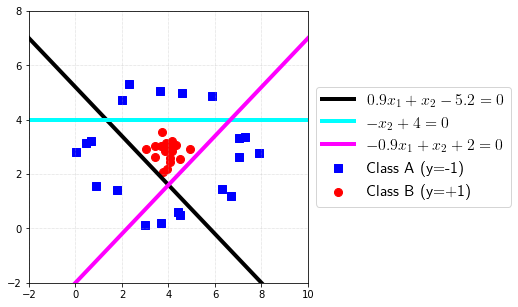

In [3]:
# Plot Points............................
fig, ax = plt.subplots(1, 1, figsize=[5, 5])
plt.rc('text', usetex=True)
ax.scatter(X[y==-1,0],X[y==-1,1],s=64,edgecolors='blue',marker='s', facecolors='blue',label='Class A (y=-1)')
ax.scatter(X[y==+1,0],X[y==+1,1],s=64,edgecolors='red',marker='o', facecolors='red',label='Class B (y=+1)')
ax.grid(linestyle=':', linewidth=0.5)

ax.set_xlim(-2,10)
ax.set_ylim(-2,8)

t=np.linspace(-2,10,100)
ax.plot(t,-9/10*(t-8)-2,linewidth=4,color=[0,0,0],label='$0.9x_1+x_2-5.2=0$')
ax.plot(t,4*np.ones_like(t),linewidth=4,color=[0,1,1],label='$-x_2+4=0$')
ax.plot(t,9/10*(t)-2,linewidth=4,color=[1,0,1],label='$-0.9x_1+x_2+2=0$')

ax.legend(loc='center left', bbox_to_anchor=(1, .5), ncol=1, fontsize=16,facecolor=[1,1,1])

In [29]:
def pers_plot(ax,cord,w,b,X=[],y=[]):  
    ax.grid(linestyle=':', linewidth=0.5)
    ax.set_xlim(cord[0],cord[1])
    ax.set_ylim(cord[2],cord[3])


    if w[1]!=0:
        xx=np.array([cord[0],cord[1]])
        yy=np.array([-(w[0]*cord[0]+b)/w[1],-(w[0]*cord[1]+b)/w[1]])

        if w[0]*xx[0]+w[1]*(yy[0]+.1)+b<0:
            manfi,mosbat=cord[3],cord[2]
        else:
            mosbat,manfi=cord[3],cord[2]

        ax.fill_between(xx,manfi,yy,color=[0,0,1],alpha=.1,label='Negative Part')
        ax.fill_between(xx,mosbat,yy,color=[1,0,0],alpha=.1,label='Positive Part')
        ax.plot([cord[0],cord[1]],[-(w[0]*cord[0]+b)/w[1],-(w[0]*cord[1]+b)/w[1]],linewidth=4,color=[0,0,0],label='$'+str(w[0])+'x_1+'+str(w[1])+'x_2+'+str(b)+'=0$') #Plot Line

    else:
        z=-b/w[0]
        xx=np.array([z,z])
        yy=np.array([cord[2],cord[3]])   

        xxx=np.array([cord[0],z,cord[1]])
        ax.fill_between(xxx,cord[2],cord[3],where=w[0]*xxx+b<=0,color=[0,0,1],alpha=.1,label='Negative Part')
        ax.fill_between(xxx,cord[2],cord[3],where=w[0]*xxx+b>=0,color=[1,0,0],alpha=.1,label='Negative Part')
        ax.plot(xx,yy,linewidth=4,color=[0,0,0],label='$'+str(w[0])+'x_1+'+str(w[1])+'x_2+'+str(b)+'=0$') #Plot Line

    if len(y)>0:
        ax.scatter(X[y==-1,0],X[y==-1,1],s=64,edgecolors='blue',marker='s', facecolors='blue',label='Class A (y=-1)')
        ax.scatter(X[y==+1,0],X[y==+1,1],s=64,edgecolors='red',marker='o', facecolors='red',label='Class B (y=+1)')
    
    ax.legend(loc='center left', bbox_to_anchor=(1, .5), ncol=1, fontsize=16,facecolor=[1,1,1])


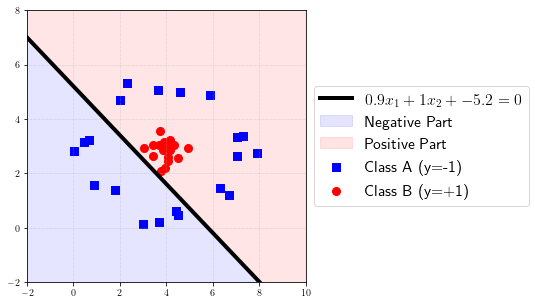

In [37]:
cord=[-2,10,-2,8]
fig, ax = plt.subplots(1, 1, figsize=[5, 5])
pers_plot(ax,cord,[0.9,1],-5.2,X,y)
plt.show()

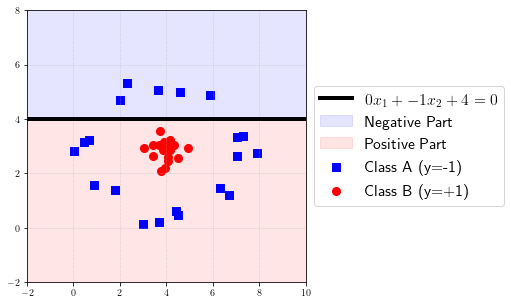

In [33]:
cord=[-2,10,-2,8]
fig, ax = plt.subplots(1, 1, figsize=[5, 5])
pers_plot(ax,cord,[0,-1],+4,X,y)
plt.show()

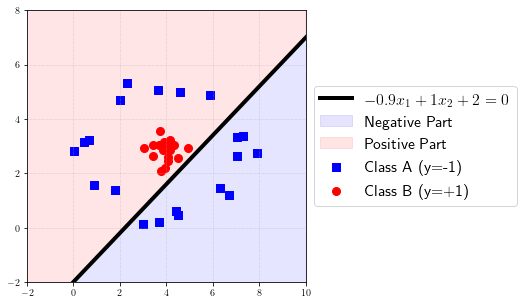

In [34]:
cord=[-2,10,-2,8]
fig, ax = plt.subplots(1, 1, figsize=[5, 5])
pers_plot(ax,cord,[-.9,1],2,X,y)
plt.show()

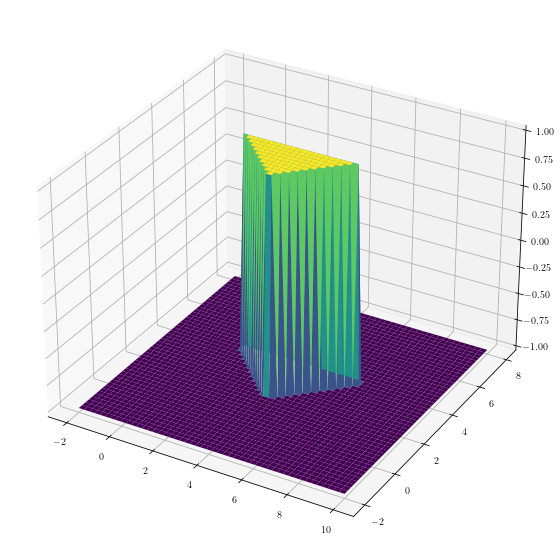

In [35]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=[10, 10])
xx=np.linspace(-2,10,50)
yy=np.linspace(-2,8,50)
XX,YY=np.meshgrid(xx,yy)
ZZ=np.sign(1.1*np.sign(0.9*XX+YY-5.2)+1.1*np.sign(-YY+4)+1.1*np.sign(-0.9*XX+YY+2) -3)
ax.plot_surface(XX,YY,ZZ,cmap='viridis', edgecolor='none')
